# Aprendizaje No Supervisado


![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/unsupervised.png)

## Tareas y algoritmos del Aprendizaje no supervisado

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/unsupervisedalg.jpg)
Fuente de la imagen: 10.1016/j.cosrev.2020.100254

## Principal Component Analysis (PCA)

![](https://upload.wikimedia.org/wikipedia/commons/9/9c/PCA_Projection_Illustration.gif)
Fuente del gif: Wiki.

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/pca_andrewng1.png)

Fuente de la imagen: Machine Learning Lectures by Prof. Andrew NG at Stanford University

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
cancer_dataset = load_breast_cancer()
df_cancer = load_breast_cancer(as_frame=True).frame
X = cancer_dataset.data
y = cancer_dataset.target
labels = cancer_dataset.target_names
df_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
labels

array(['malignant', 'benign'], dtype='<U9')

In [4]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components

print("explained variance ratio (first two components): %s"
       % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [0.98204467 0.01617649]


<IPython.core.display.Javascript object>


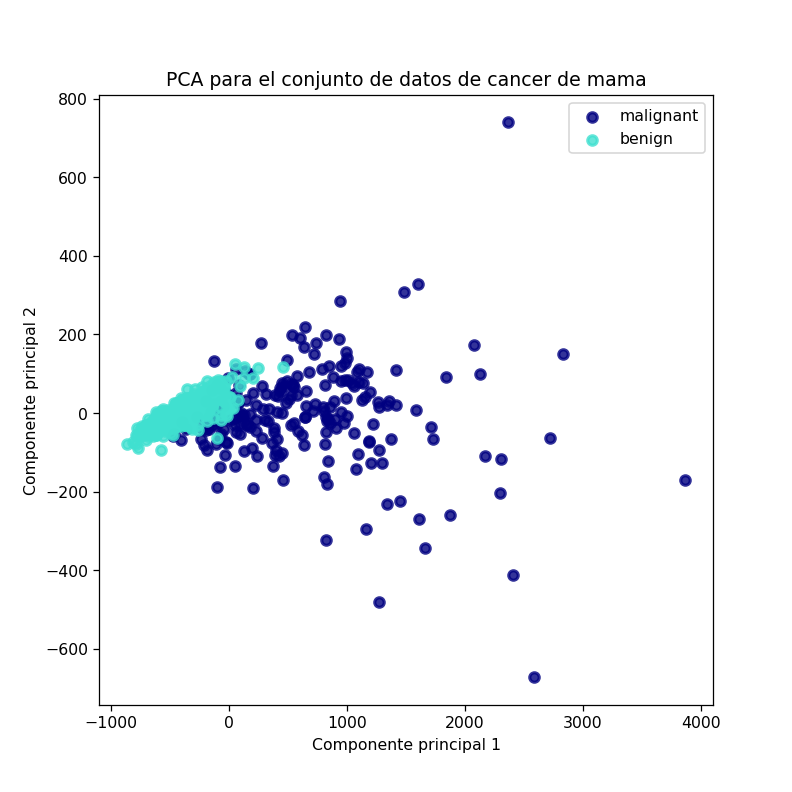

In [5]:
plt.figure(figsize=(7, 7))

colors = ["navy", "turquoise"]

lw = 2

for color, i, target_name in zip(colors, [0, 1], labels):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
    
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA para el conjunto de datos de cancer de mama")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

**Ejercicio**: Hacer una reducción dimensional a 2D para el conjunto de datos iris.

## K-means


![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)
Fuente del gif: Wikipedia.

Usar datos: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [6]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [7]:
df_diabetes = pd.read_csv("datasets/diabetes.csv")
df_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Usemos solo 2 o 3 variables

In [8]:
df_diab_filter = df_diabetes[['Pregnancies', 'BloodPressure', 'BMI']]
df_diab_filter.head(3)

,Pregnancies,BloodPressure,BMI
0,6,72,33.6
1,1,66,26.6
2,8,64,23.3


In [9]:
X = df_diab_filter.values
y = df_diabetes[['Outcome']].values
labels = ['Con diabetes' if l == 1 else 'Sin diabetes' for l in y]
colores = ['red' if l == 1 else 'green' for l in y]
np.shape(X), np.shape(y), type(y)

((768, 3), (768, 1), numpy.ndarray)

<IPython.core.display.Javascript object>


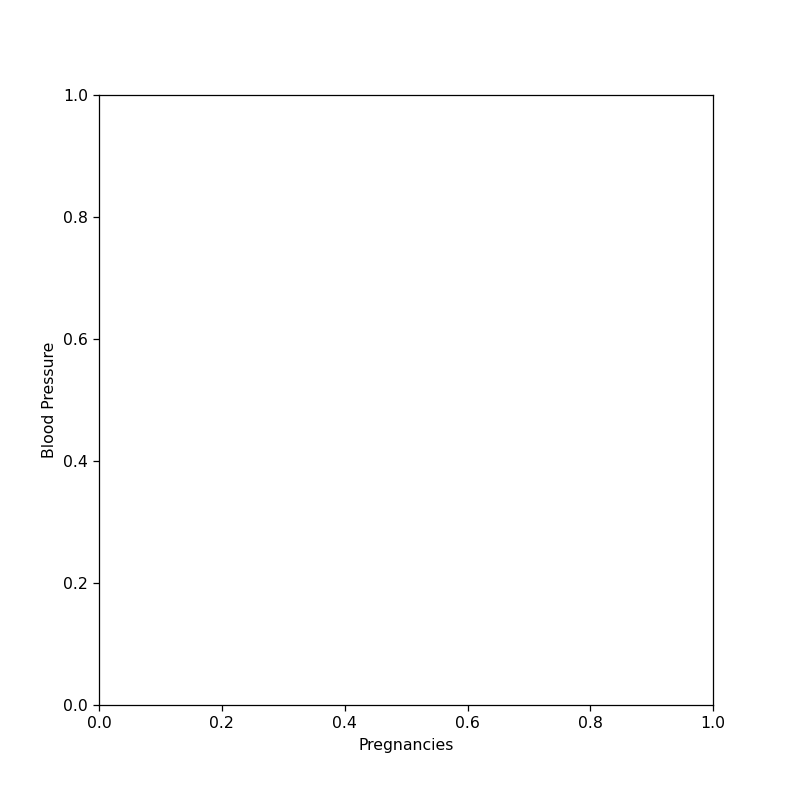

Text(0.5, 0, 'BMI')

In [10]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colores,s=60)
plt.xlabel("Pregnancies")
plt.ylabel("Blood Pressure")
ax.set_zlabel("BMI")

<IPython.core.display.Javascript object>


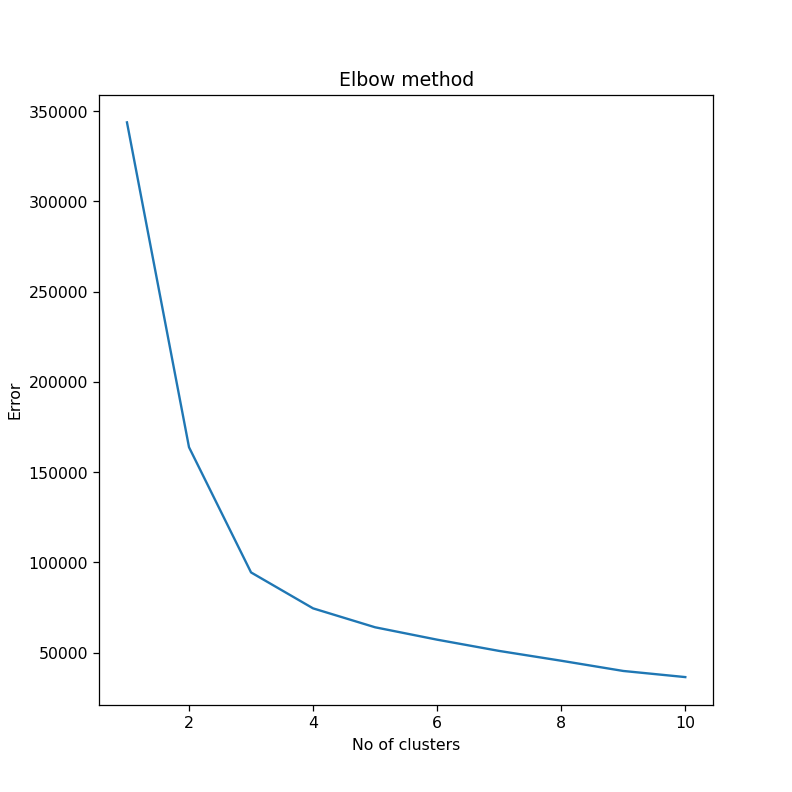

/home/isidro/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/isidro/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/isidro/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/isidro/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/isidro/.local/lib/python3.

In [11]:

plt.figure(figsize=(7, 7))
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.savefig("elbow")
plt.show()

In [12]:
# Para el ejercicio, elijo 3 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.87105624 72.6351166  32.26529492]
 [ 3.35897436  3.12820513 26.89487179]]


/home/isidro/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>


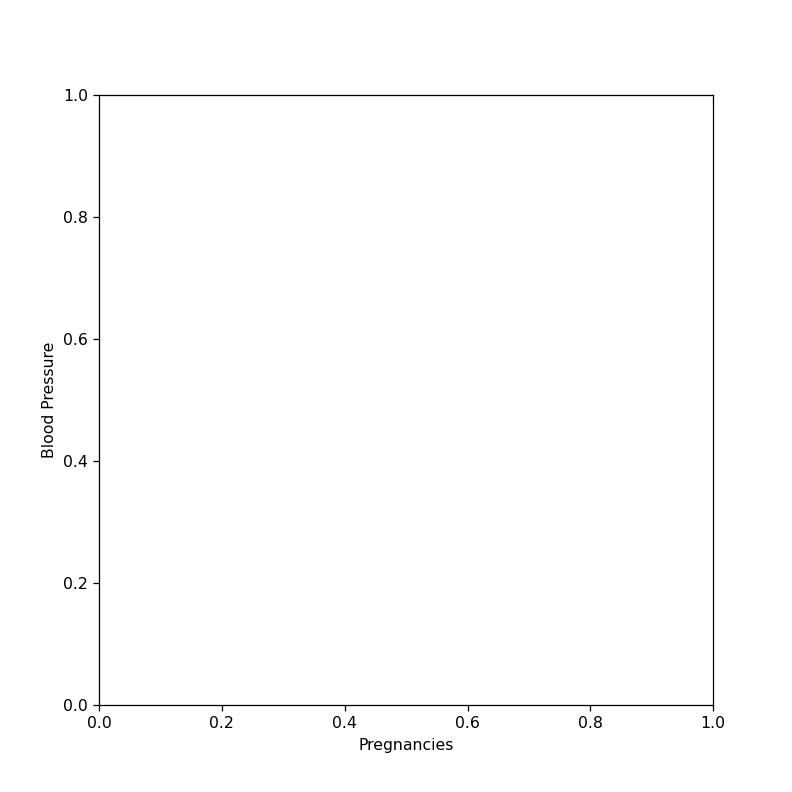

Text(0.5, 0, 'BMI')

In [13]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels_p = kmeans.predict(X)
labels_pred = ['Con diabetes' if l == 1 else 'Sin diabetes' for l in labels_p]
colors_pred = ['red' if l == 1 else 'green' for l in labels_p]
# Obtenemos los centroids
C = kmeans.cluster_centers_

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors_pred, s=60, alpha=1)
# ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c=['blue', 'red'], s=1000)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colores,s=60, marker='x')

plt.xlabel("age")
plt.ylabel("Body Mass Index (BMI)")

plt.xlabel("Pregnancies")
plt.ylabel("Blood Pressure")
ax.set_zlabel("BMI")

**Ejercicio:** Utilizar otro algoritmo de clustering.